Complete this notebook. See TODO cells. This exercise uses the movielens dataset we used in the previous assignment, but now we will analyze it using dataframes. 

Let's setup Spark on your Colab environment.  Run the cell below!

In [164]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://apache.mirror.colo-serv.net/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark
findspark.init("spark-2.4.7-bin-hadoop2.7")# SPARK_HOME

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()

In [165]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2021-04-12 03:44:36--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.1’

ml-latest-small.zip 100%[===================>] 955.28K  1.46MB/s    in 0.6s    

2021-04-12 03:44:37 (1.46 MB/s) - ‘ml-latest-small.zip.1’ saved [978202/978202]

Archive:  ml-latest-small.zip
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ml-latest-small/links.csv  
replace ml-latest-small/tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ml-latest-small/tags.csv  
replace ml-latest-small/ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ml-latest-small/ratings.csv  
replace ml-latest-small/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflati

In [166]:
ratings = spark.read.csv("ml-latest-small/ratings.csv", header=True)
movies = spark.read.csv("ml-latest-small/movies.csv", header=True)

In [167]:
ratings.show()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
|     1|    349|   4.0|964982563|
+------+-------+------+---------+
only showing top 20 rows



In [168]:
movies.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

Check the schema:

In [9]:
ratings.printSchema()
movies.printSchema()

root
 |-- userId: string (nullable = true)
 |-- movieId: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- timestamp: string (nullable = true)

root
 |-- movieId: string (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



Get a sample with `take()`:

In [169]:
ratings.take(3)

[Row(userId='1', movieId='1', rating='4.0', timestamp='964982703'),
 Row(userId='1', movieId='3', rating='4.0', timestamp='964981247'),
 Row(userId='1', movieId='6', rating='4.0', timestamp='964982224')]

Get a formatted sample with `show()`:

In [170]:
ratings.show()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
|     1|    349|   4.0|964982563|
+------+-------+------+---------+
only showing top 20 rows



In [171]:
movies.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

In [172]:
print("In total there are {0} movies".format(movies.count()))

In total there are 9742 movies


In [16]:
# check type
type(movies)

pyspark.sql.dataframe.DataFrame

In [30]:
ratings

DataFrame[userId: string, movieId: string, rating: string, timestamp: string]

In [173]:
# TODO 
# How many ratings are there for each movie id? 
# Sort descending by the count of ratings. 
# Do not use SQL for this cell. 


# rdd works (different output)
# movie_counts_rdd = ratings.rdd.map(lambda row: (row.movieId, 1))
# movie_counts_rdd_count = movie_counts_rdd.reduceByKey(lambda a,b: a+b).sortBy(lambda r: -r[1])
# movie_counts_rdd_count.collect()

# DataFrame (good to use)
movie_counts = ratings.groupBy("movieid").agg(count("rating").alias("cnt")).sort(desc("cnt"))
movie_counts.show()




+-------+---+
|movieid|cnt|
+-------+---+
|    356|329|
|    318|317|
|    296|307|
|    593|279|
|   2571|278|
|    260|251|
|    480|238|
|    110|237|
|    589|224|
|    527|220|
|   2959|218|
|      1|215|
|   1196|211|
|   2858|204|
|     50|204|
|     47|203|
|    780|202|
|    150|201|
|   1198|200|
|   4993|198|
+-------+---+
only showing top 20 rows



Expected result: 

<pre>
+-------+---+
|movieid|cnt|
+-------+---+
|    356|329|
|    318|317|
|    296|307|
|    593|279|
|   2571|278|
|    260|251|
|    480|238|
|    110|237|
|    589|224|
|    527|220|
|   2959|218|
|      1|215|
|   1196|211|
|   2858|204|
|     50|204|
|     47|203|
|    780|202|
|    150|201|
|   1198|200|
|   4993|198|
+-------+---+
only showing top 20 rows
</pre>

In [174]:
# TODO
# Register the ratings and movies dataframes as tables 
# so that we can execute sql queries on them. 
ratings.registerTempTable("ratings")
movies.registerTempTable("movies")



In [175]:
# TODO
# Use SQL
# How many ratings are there for each movie id? 
# Sort descending by the count of ratings. 
query = '''
Select movieId,count(rating) As cnt
From ratings
Group by movieId
order by cnt desc
'''

result = spark.sql(query)
result.show()


+-------+---+
|movieId|cnt|
+-------+---+
|    356|329|
|    318|317|
|    296|307|
|    593|279|
|   2571|278|
|    260|251|
|    480|238|
|    110|237|
|    589|224|
|    527|220|
|   2959|218|
|      1|215|
|   1196|211|
|   2858|204|
|     50|204|
|     47|203|
|    780|202|
|    150|201|
|   1198|200|
|   4993|198|
+-------+---+
only showing top 20 rows



Expected result: same as before. 

In [210]:
# TODO
# Use SQL
# Find the average rating for each movie that has more than 50 ratings. 
# Sort descending by average rating. 

query = '''
SELECT ratings.movieId, movies.title,(sum(ratings.rating)/count(ratings.rating)) as avgrating
FROM ratings NATURAL JOIN movies 
GROUP BY ratings.movieId , movies.title
HAVING count(ratings.rating) > 50
ORDER BY avgrating desc
'''

result = spark.sql(query)
result.show()


+-------+--------------------+------------------+
|movieId|               title|         avgrating|
+-------+--------------------+------------------+
|    318|Shawshank Redempt...| 4.429022082018927|
|    858|Godfather, The (1...|         4.2890625|
|   2959|   Fight Club (1999)| 4.272935779816514|
|   1276|Cool Hand Luke (1...| 4.271929824561403|
|    750|Dr. Strangelove o...| 4.268041237113402|
|    904|  Rear Window (1954)| 4.261904761904762|
|   1221|Godfather: Part I...|  4.25968992248062|
|  48516|Departed, The (2006)| 4.252336448598131|
|   1213|   Goodfellas (1990)|              4.25|
|    912|   Casablanca (1942)|              4.24|
|  58559|Dark Knight, The ...| 4.238255033557047|
|     50|Usual Suspects, T...| 4.237745098039215|
|   1197|Princess Bride, T...| 4.232394366197183|
|    260|Star Wars: Episod...| 4.231075697211155|
|    527|Schindler's List ...|             4.225|
|   1208|Apocalypse Now (1...| 4.219626168224299|
|   2329|American History ...| 4.217054263565892|


Expected result: 

<pre>
+-------+--------------------+------------------+
|movieId|               title|         avgrating|
+-------+--------------------+------------------+
|    318|Shawshank Redempt...| 4.429022082018927|
|    858|Godfather, The (1...|         4.2890625|
|   2959|   Fight Club (1999)| 4.272935779816514|
|   1276|Cool Hand Luke (1...| 4.271929824561403|
|    750|Dr. Strangelove o...| 4.268041237113402|
|    904|  Rear Window (1954)| 4.261904761904762|
|   1221|Godfather: Part I...|  4.25968992248062|
|  48516|Departed, The (2006)| 4.252336448598131|
|   1213|   Goodfellas (1990)|              4.25|
|    912|   Casablanca (1942)|              4.24|
|  58559|Dark Knight, The ...| 4.238255033557047|
|     50|Usual Suspects, T...| 4.237745098039215|
|   1197|Princess Bride, T...| 4.232394366197183|
|    260|Star Wars: Episod...| 4.231075697211155|
|    527|Schindler's List ...|             4.225|
|   1208|Apocalypse Now (1...| 4.219626168224299|
|   2329|American History ...| 4.217054263565892|
|   1196|Star Wars: Episod...|4.2156398104265405|
|   1252|    Chinatown (1974)| 4.211864406779661|
|   1198|Raiders of the Lo...|            4.2075|
+-------+--------------------+------------------+
only showing top 20 rows
</pre>

In [155]:
movies.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

In [186]:
# TODO
# Here we want to extract the genres from the movies table. 
# This can be done easily using the underlying RDD of the movies dataframe. 
new_movies = movies.drop("title")
movies_rdd = new_movies.rdd.map( lambda row: (row.movieId, row.genres))
movies_rdd.collect()


[('1', 'Adventure|Animation|Children|Comedy|Fantasy'),
 ('2', 'Adventure|Children|Fantasy'),
 ('3', 'Comedy|Romance'),
 ('4', 'Comedy|Drama|Romance'),
 ('5', 'Comedy'),
 ('6', 'Action|Crime|Thriller'),
 ('7', 'Comedy|Romance'),
 ('8', 'Adventure|Children'),
 ('9', 'Action'),
 ('10', 'Action|Adventure|Thriller'),
 ('11', 'Comedy|Drama|Romance'),
 ('12', 'Comedy|Horror'),
 ('13', 'Adventure|Animation|Children'),
 ('14', 'Drama'),
 ('15', 'Action|Adventure|Romance'),
 ('16', 'Crime|Drama'),
 ('17', 'Drama|Romance'),
 ('18', 'Comedy'),
 ('19', 'Comedy'),
 ('20', 'Action|Comedy|Crime|Drama|Thriller'),
 ('21', 'Comedy|Crime|Thriller'),
 ('22', 'Crime|Drama|Horror|Mystery|Thriller'),
 ('23', 'Action|Crime|Thriller'),
 ('24', 'Drama|Sci-Fi'),
 ('25', 'Drama|Romance'),
 ('26', 'Drama'),
 ('27', 'Children|Drama'),
 ('28', 'Drama|Romance'),
 ('29', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'),
 ('30', 'Crime|Drama'),
 ('31', 'Drama'),
 ('32', 'Mystery|Sci-Fi|Thriller'),
 ('34', 'Children|Drama'),
 (

Expected result (showing 20 elements only): 

<pre>
[('1', 'Adventure|Animation|Children|Comedy|Fantasy'),
 ('2', 'Adventure|Children|Fantasy'),
 ('3', 'Comedy|Romance'),
 ('4', 'Comedy|Drama|Romance'),
 ('5', 'Comedy'),
 ('6', 'Action|Crime|Thriller'),
 ('7', 'Comedy|Romance'),
 ('8', 'Adventure|Children'),
 ('9', 'Action'),
 ('10', 'Action|Adventure|Thriller'),
 ('11', 'Comedy|Drama|Romance'),
 ('12', 'Comedy|Horror'),
 ('13', 'Adventure|Animation|Children'),
 ('14', 'Drama'),
 ('15', 'Action|Adventure|Romance'),
 ('16', 'Crime|Drama'),
 ('17', 'Drama|Romance'),
 ('18', 'Comedy'),
 ('19', 'Comedy'),
 ('20', 'Action|Comedy|Crime|Drama|Thriller')]
</pre>

In [197]:
# TODO
# Now we want to create a flattened out RDD of (movieId, genre) pairs.
# Use flatMapValues on the previous RDD. 
# See: https://spark.apache.org/docs/1.1.1/api/python/pyspark.rdd.RDD-class.html#flatMapValues
# Call the result RDD: moviegenres_flat_rdd

result = movies_rdd.flatMapValues(lambda x: x.split('|'))
result.collect()

[('1', 'Adventure'),
 ('1', 'Animation'),
 ('1', 'Children'),
 ('1', 'Comedy'),
 ('1', 'Fantasy'),
 ('2', 'Adventure'),
 ('2', 'Children'),
 ('2', 'Fantasy'),
 ('3', 'Comedy'),
 ('3', 'Romance'),
 ('4', 'Comedy'),
 ('4', 'Drama'),
 ('4', 'Romance'),
 ('5', 'Comedy'),
 ('6', 'Action'),
 ('6', 'Crime'),
 ('6', 'Thriller'),
 ('7', 'Comedy'),
 ('7', 'Romance'),
 ('8', 'Adventure'),
 ('8', 'Children'),
 ('9', 'Action'),
 ('10', 'Action'),
 ('10', 'Adventure'),
 ('10', 'Thriller'),
 ('11', 'Comedy'),
 ('11', 'Drama'),
 ('11', 'Romance'),
 ('12', 'Comedy'),
 ('12', 'Horror'),
 ('13', 'Adventure'),
 ('13', 'Animation'),
 ('13', 'Children'),
 ('14', 'Drama'),
 ('15', 'Action'),
 ('15', 'Adventure'),
 ('15', 'Romance'),
 ('16', 'Crime'),
 ('16', 'Drama'),
 ('17', 'Drama'),
 ('17', 'Romance'),
 ('18', 'Comedy'),
 ('19', 'Comedy'),
 ('20', 'Action'),
 ('20', 'Comedy'),
 ('20', 'Crime'),
 ('20', 'Drama'),
 ('20', 'Thriller'),
 ('21', 'Comedy'),
 ('21', 'Crime'),
 ('21', 'Thriller'),
 ('22', 'Crime'

Expected result (showing 20 elements only):

<pre>
[('1', 'Adventure'),
 ('1', 'Animation'),
 ('1', 'Children'),
 ('1', 'Comedy'),
 ('1', 'Fantasy'),
 ('2', 'Adventure'),
 ('2', 'Children'),
 ('2', 'Fantasy'),
 ('3', 'Comedy'),
 ('3', 'Romance'),
 ('4', 'Comedy'),
 ('4', 'Drama'),
 ('4', 'Romance'),
 ('5', 'Comedy'),
 ('6', 'Action'),
 ('6', 'Crime'),
 ('6', 'Thriller'),
 ('7', 'Comedy'),
 ('7', 'Romance'),
 ('8', 'Adventure')]
</pre>

In [199]:
# TODO
# Now convert the last RDD into a dataframe for further analytics. 
# Just uncomment the following lines. 

moviegenres = spark.createDataFrame(result).toDF("movieId", "genre")
moviegenres.show()

# Register dataframe as a table.
moviegenres.registerTempTable('moviegenres')

+-------+---------+
|movieId|    genre|
+-------+---------+
|      1|Adventure|
|      1|Animation|
|      1| Children|
|      1|   Comedy|
|      1|  Fantasy|
|      2|Adventure|
|      2| Children|
|      2|  Fantasy|
|      3|   Comedy|
|      3|  Romance|
|      4|   Comedy|
|      4|    Drama|
|      4|  Romance|
|      5|   Comedy|
|      6|   Action|
|      6|    Crime|
|      6| Thriller|
|      7|   Comedy|
|      7|  Romance|
|      8|Adventure|
+-------+---------+
only showing top 20 rows



Expected result: 

<pre>
+-------+---------+
|movieId|    genre|
+-------+---------+
|      1|Adventure|
|      1|Animation|
|      1| Children|
|      1|   Comedy|
|      1|  Fantasy|
|      2|Adventure|
|      2| Children|
|      2|  Fantasy|
|      3|   Comedy|
|      3|  Romance|
|      4|   Comedy|
|      4|    Drama|
|      4|  Romance|
|      5|   Comedy|
|      6|   Action|
|      6|    Crime|
|      6| Thriller|
|      7|   Comedy|
|      7|  Romance|
|      8|Adventure|
+-------+---------+
only showing top 20 rows
</pre>

In [247]:
# TODO
# Use SQL
# Find the average rating for each genre that has at least 50 ratings. 
# Order descending by average rating. 
query = '''
SELECT moviegenres.genre,(sum(ratings.rating)/count(ratings.rating)) as avgrating
FROM ratings NATURAL JOIN moviegenres
GROUP BY genre
HAVING count(ratings.rating) >= 50
ORDER BY avgrating desc
'''

result = spark.sql(query)
result.show()


+-----------+------------------+
|      genre|         avgrating|
+-----------+------------------+
|  Film-Noir| 3.920114942528736|
|        War|   3.8082938876312|
|Documentary| 3.797785069729286|
|      Crime| 3.658293867274144|
|      Drama|3.6561844113718758|
|    Mystery| 3.632460255407871|
|  Animation|3.6299370349170004|
|       IMAX| 3.618335343787696|
|    Western| 3.583937823834197|
|    Musical|3.5636781053649105|
|  Adventure|3.5086089151939075|
|    Romance|3.5065107040388437|
|   Thriller|3.4937055799183425|
|    Fantasy|3.4910005070136894|
|     Sci-Fi| 3.455721162210752|
|     Action| 3.447984331646809|
|   Children| 3.412956125108601|
|     Comedy|3.3847207640898267|
|     Horror| 3.258195034974626|
+-----------+------------------+



Expected result: 

<pre>
+-----------+------------------+
|      genre|         avgrating|
+-----------+------------------+
|  Film-Noir| 3.920114942528736|
|        War|   3.8082938876312|
|Documentary| 3.797785069729286|
|      Crime| 3.658293867274144|
|      Drama|3.6561844113718758|
|    Mystery| 3.632460255407871|
|  Animation|3.6299370349170004|
|       IMAX| 3.618335343787696|
|    Western| 3.583937823834197|
|    Musical|3.5636781053649105|
|  Adventure|3.5086089151939075|
|    Romance|3.5065107040388437|
|   Thriller|3.4937055799183425|
|    Fantasy|3.4910005070136894|
|     Sci-Fi| 3.455721162210752|
|     Action| 3.447984331646809|
|   Children| 3.412956125108601|
|     Comedy|3.3847207640898267|
|     Horror| 3.258195034974626|
+-----------+------------------+
</pre>

The Dataframe is small enough to be moved to Pandas:

In [248]:
# Uncomment following lines. 
result_pd = result.toPandas()
result_pd.head()

,genre,avgrating
0,Film-Noir,3.920115
1,War,3.808294
2,Documentary,3.797785
3,Crime,3.658294
4,Drama,3.656184


Let's plot a barchart:

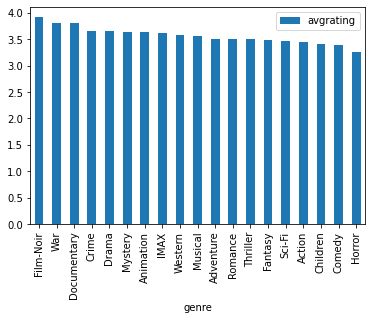

In [249]:
# Uncomment following line. 
result_pd.plot(kind="bar", x="genre", y="avgrating")